In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
import cv2

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, recall_score
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

random.seed(268822)

In [91]:
df = pd.read_csv("final_results.csv", index_col=False)

In [92]:
df = df.drop(columns = ["Unnamed: 0"])

In [93]:
df = df.drop(columns = ["localization"])

In [94]:
df

,path,disease,age,mean,median,min,max,area,std,iqr,...,mean_saturation,major_ax,minor_ax,center_x,center_y,mean_saturation_change,std_saturation_change,median_saturation_change,increase_percentage,decrease_percentage
0,ISIC_0027419,bkl,80.0,144.034817,148.0,2,254,997009,34.931155,252,...,57.878947,77.089714,128.782120,269.197327,125.769463,-0.727703,2.501317,0.000000,42.857143,42.857143
1,ISIC_0025030,bkl,80.0,132.595216,136.0,1,254,720655,42.065064,253,...,55.319546,66.559380,138.036285,243.610779,147.554611,1.309145,2.945699,-0.103565,33.333333,50.000000
2,ISIC_0026769,bkl,80.0,114.123648,107.0,1,254,2057307,33.835301,253,...,69.358229,121.786186,222.735840,202.939087,108.218552,-0.421248,1.651056,-0.003981,36.363636,54.545455
3,ISIC_0025661,bkl,80.0,125.603728,115.0,1,254,781632,43.350625,253,...,70.941380,72.593498,142.430984,219.815445,125.858437,0.905881,1.139927,1.640659,71.428571,14.285714
4,ISIC_0031633,bkl,75.0,136.657175,134.0,1,254,7097837,30.286992,253,...,56.232024,268.871704,366.358765,160.529007,150.193634,0.580877,2.890308,-0.355991,46.153846,50.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10009,ISIC_0033084,akiec,40.0,137.440162,138.0,1,254,5509014,31.867975,253,...,46.421570,223.822693,262.829559,232.771774,168.046814,-1.360497,1.608238,-1.301222,22.727273,72.727273
10010,ISIC_0033550,akiec,40.0,141.243930,144.0,1,255,3135474,35.520313,254,...,47.040800,176.839844,198.419327,226.147995,188.076416,-0.595705,1.441144,0.000000,47.058824,47.058824
10011,ISIC_0033536,akiec,40.0,125.499865,123.0,1,254,3714294,31.632516,253,...,39.501882,197.477890,213.991867,237.621750,190.619934,-0.915492,0.754019,-0.865893,5.263158,89.473684
10012,ISIC_0032854,akiec,80.0,127.995769,122.0,2,254,1361235,42.632869,252,...,47.810190,131.629593,183.172287,121.404564,69.181725,1.371081,1.960110,1.096688,58.333333,33.333333


In [95]:
X = df.drop(columns=['disease', 'path']) 
y = df['disease']  

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [97]:
max_depth_values = [5, 10, 15, 20, 25, None]

cv_scores = []

for max_depth in max_depth_values:
    rf = RandomForestClassifier(max_depth=max_depth, n_estimators=200, random_state=4)
    scores = cross_val_score(rf, X_train, y_train, cv=4, scoring='accuracy')
    cv_scores.append(np.mean(scores))

best_depth = max_depth_values[np.argmax(cv_scores)]

print("Wyniki walidacji krzyżowej dla różnych max_depth:")
for depth, score in zip(max_depth_values, cv_scores):
    print(f"max_depth={depth}: Średnia dokładność = {score:.4f}")

print(f"Najlepsza wartość max_depth: {best_depth}")


Wyniki walidacji krzyżowej dla różnych max_depth:
max_depth=5: Średnia dokładność = 0.7010
max_depth=10: Średnia dokładność = 0.7212
max_depth=15: Średnia dokładność = 0.7232
max_depth=20: Średnia dokładność = 0.7259
max_depth=25: Średnia dokładność = 0.7256
max_depth=None: Średnia dokładność = 0.7254
Najlepsza wartość max_depth: 20


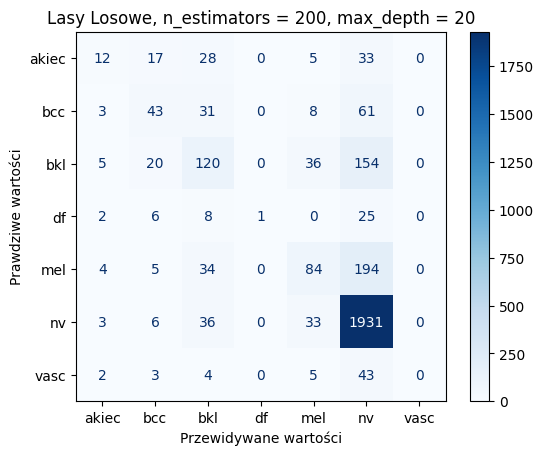

Accuracy: 0.7291181364392679
              precision    recall  f1-score   support

       akiec       0.39      0.13      0.19        95
         bcc       0.43      0.29      0.35       146
         bkl       0.46      0.36      0.40       335
          df       1.00      0.02      0.05        42
         mel       0.49      0.26      0.34       321
          nv       0.79      0.96      0.87      2009
        vasc       0.00      0.00      0.00        57

    accuracy                           0.73      3005
   macro avg       0.51      0.29      0.31      3005
weighted avg       0.68      0.73      0.69      3005



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [98]:
clf = RandomForestClassifier(n_estimators=200, random_state=4, max_depth=20)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.xlabel("Przewidywane wartości")
plt.ylabel("Prawdziwe wartości")
plt.title("Lasy Losowe, n_estimators = 200, max_depth = 20")
plt.show()

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 18 is smaller than n_iter=100. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


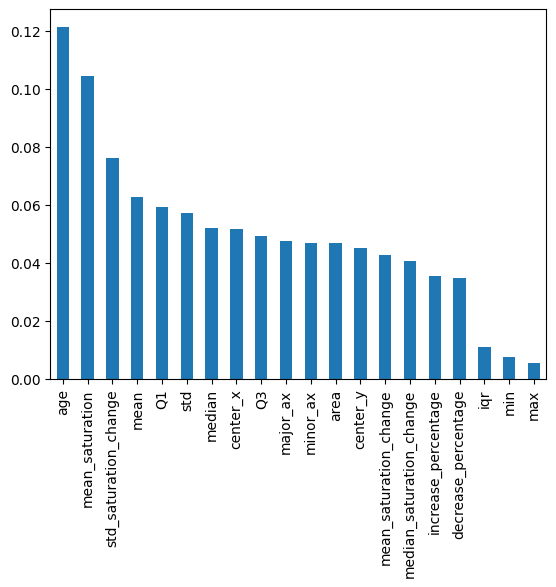

In [99]:
model = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 150, 200],  
    'max_depth': [None, 10, 15, 20, 25, 30]
}
search = RandomizedSearchCV(model, param_grid, n_iter=100, random_state=42)
search.fit(X_train, y_train)
feature_importances = pd.Series(search.best_estimator_.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_importances.plot.bar();

Text(0, 0.5, 'Ważność cechy')

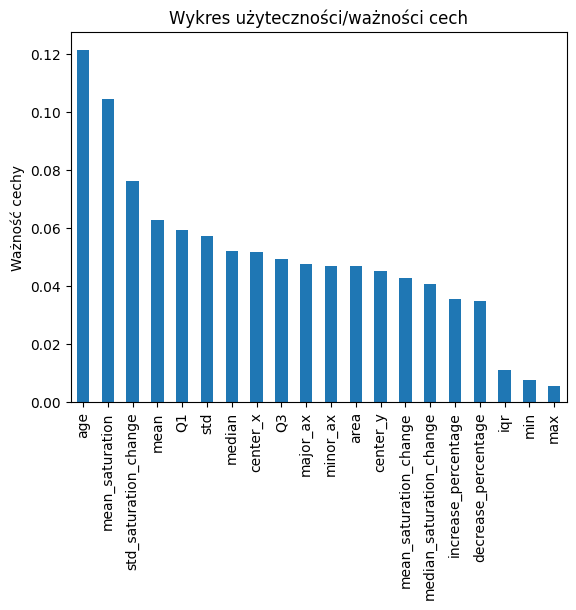

In [100]:
feature_importances.plot.bar()
plt.title("Wykres użyteczności/ważności cech")
plt.ylabel("Ważność cechy")

# Balanced

In [101]:
target_size = 1000

balanced_df = (
    df.groupby('disease', group_keys=False)  
      .apply(lambda x: x.sample(n=target_size, random_state=42, replace=True))  
)

print(balanced_df['disease'].value_counts())

disease
akiec    1000
bcc      1000
bkl      1000
df       1000
mel      1000
nv       1000
vasc     1000
Name: count, dtype: int64


/var/folders/yz/bms59l5j5cl16ztb19ty54s40000gn/T/ipykernel_95019/3751097694.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=target_size, random_state=42, replace=True))


In [102]:
X = balanced_df.drop(columns=['disease', 'path']) 
y = balanced_df['disease']  

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [88]:

max_depth_values = [5, 10, 15, 20, 25, None]

cv_scores = []

for max_depth in max_depth_values:
    rf = RandomForestClassifier(max_depth=max_depth, n_estimators=200, random_state=4)
    scores = cross_val_score(rf, X_train, y_train, cv=4, scoring='accuracy')
    cv_scores.append(np.mean(scores))

best_depth = max_depth_values[np.argmax(cv_scores)]

print("Wyniki walidacji krzyżowej dla różnych max_depth:")
for depth, score in zip(max_depth_values, cv_scores):
    print(f"max_depth={depth}: Średnia dokładność = {score:.4f}")

print(f"Najlepsza wartość max_depth: {best_depth}")


Wyniki walidacji krzyżowej dla różnych max_depth:
max_depth=5: Średnia dokładność = 0.4988
max_depth=10: Średnia dokładność = 0.7778
max_depth=15: Średnia dokładność = 0.8102
max_depth=20: Średnia dokładność = 0.8112
max_depth=25: Średnia dokładność = 0.8092
max_depth=None: Średnia dokładność = 0.8088
Najlepsza wartość max_depth: 20


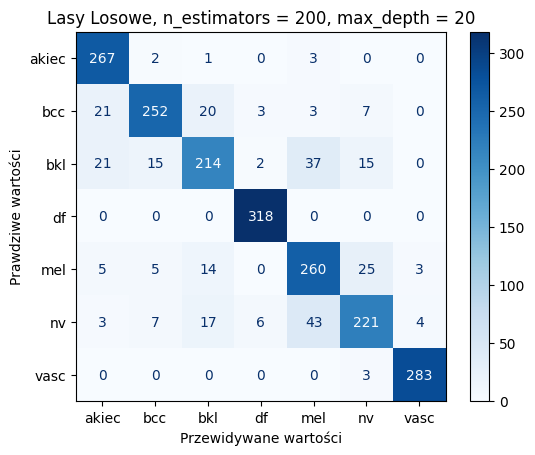

Accuracy: 0.8642857142857143
              precision    recall  f1-score   support

       akiec       0.84      0.98      0.91       273
         bcc       0.90      0.82      0.86       306
         bkl       0.80      0.70      0.75       304
          df       0.97      1.00      0.98       318
         mel       0.75      0.83      0.79       312
          nv       0.82      0.73      0.77       301
        vasc       0.98      0.99      0.98       286

    accuracy                           0.86      2100
   macro avg       0.86      0.87      0.86      2100
weighted avg       0.86      0.86      0.86      2100



In [104]:
clf = RandomForestClassifier(n_estimators=200, random_state=4, max_depth=20)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.xlabel("Przewidywane wartości")
plt.ylabel("Prawdziwe wartości")
plt.title("Lasy Losowe, n_estimators = 200, max_depth = 20")
plt.show()

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 18 is smaller than n_iter=100. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


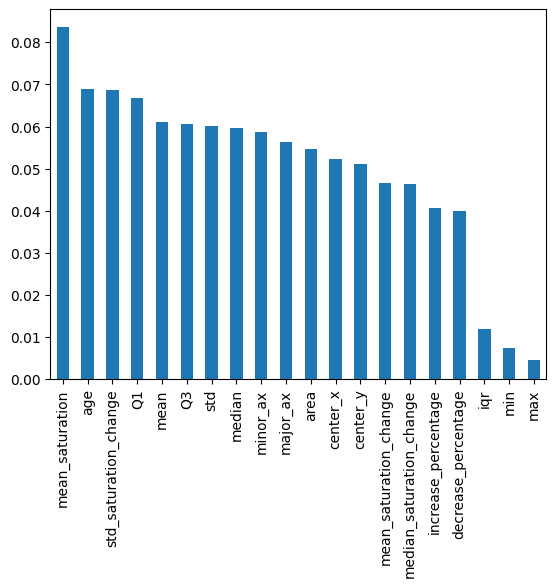

In [78]:
model = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 150, 200],  
    'max_depth': [None, 10, 15, 20, 25, 30]
}
search = RandomizedSearchCV(model, param_grid, n_iter=100, random_state=42)
search.fit(X_train, y_train)
feature_importances = pd.Series(search.best_estimator_.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_importances.plot.bar();

Text(0, 0.5, 'Ważność cechy')

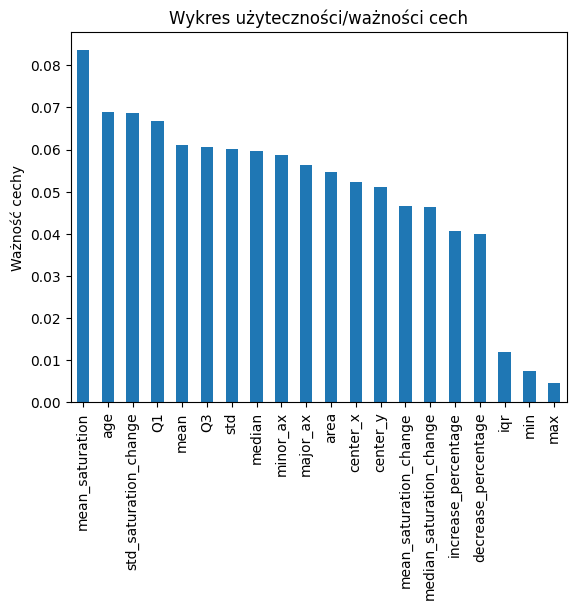

In [79]:
feature_importances.plot.bar()
plt.title("Wykres użyteczności/ważności cech")
plt.ylabel("Ważność cechy")

In [105]:
sample_sizes = np.arange(50, 2000, 100)
accurancy_list = []
recall_list = []
accurancy_list_train = []
recall_list_train = []


for target_size in sample_sizes:
    balanced_df = (
        df.groupby('disease', group_keys=False)  
        .apply(lambda x: x.sample(n=target_size, random_state=42, replace=True))  
    )
    #print(balanced_df.shape)
    X = balanced_df.drop(columns=['disease', 'path']) 
    y = balanced_df['disease']  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    clf = RandomForestClassifier(n_estimators=100, 
                                 random_state=4, 
                                 max_depth=10,
                                 min_samples_split=10, 
                                 min_samples_leaf=4,
                                 bootstrap=False)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
   # conf_matrix = confusion_matrix(y_test, y_pred)

   # disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=clf.classes_)
   # disp.plot(cmap=plt.cm.Blues)
   # plt.show()
    accurancy_list_train.append(accuracy_score(y_train, y_pred_train))
    recall_list_train.append(recall_score(y_train, y_pred_train, average="weighted"))
    accurancy_list.append(accuracy_score(y_test, y_pred))
    recall_list.append(recall_score(y_test, y_pred, average="weighted"))
    #print("Accuracy:", accuracy_score(y_test, y_pred))
    #print(classification_report(y_test, y_pred))
    #print(classification_report(y_test, y_pred))

/var/folders/yz/bms59l5j5cl16ztb19ty54s40000gn/T/ipykernel_95019/1211330440.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=target_size, random_state=42, replace=True))
/var/folders/yz/bms59l5j5cl16ztb19ty54s40000gn/T/ipykernel_95019/1211330440.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=target_size, random_state=42, replace=True))
/var/f

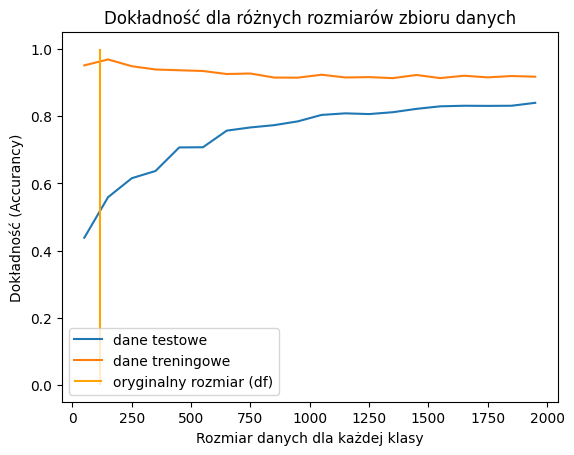

In [106]:
plt.plot(sample_sizes, accurancy_list, label = "dane testowe")
plt.plot(sample_sizes, accurancy_list_train, label = "dane treningowe")
plt.title("Dokładność dla różnych rozmiarów zbioru danych")
plt.xlabel("Rozmiar danych dla każdej klasy")
plt.ylabel("Dokładność (Accurancy)")
plt.vlines(np.min(df["disease"].value_counts()), ymin=0, ymax=1, colors="orange", label = "oryginalny rozmiar (df)")
plt.legend()

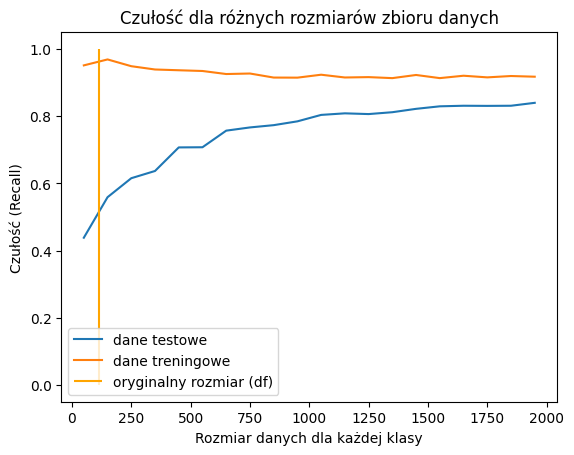

In [108]:
plt.plot(sample_sizes, recall_list, label = "dane testowe")
plt.plot(sample_sizes, recall_list_train, label = "dane treningowe")
plt.title("Czułość dla różnych rozmiarów zbioru danych")
plt.xlabel("Rozmiar danych dla każdej klasy")
plt.ylabel("Czułość (Recall)")
plt.vlines(np.min(df["disease"].value_counts()), ymin=0, ymax=1, colors="orange", label = "oryginalny rozmiar (df)")
plt.legend()

### Najpopularniejsze klasy

In [16]:
out_classes = ["df", "vasc", "akiec", "bcc"]

In [17]:
df_small = df[~df["disease"].isin(out_classes)]


In [18]:
df_small["disease"].value_counts()

disease
nv     6705
mel    1113
bkl    1099
Name: count, dtype: int64

In [19]:
target_size = 1000

balanced_df_small = (
    df_small.groupby('disease', group_keys=False)  
      .apply(lambda x: x.sample(n=target_size, random_state=42, replace=True))  
)

print(balanced_df_small['disease'].value_counts())

disease
bkl    1000
mel    1000
nv     1000
Name: count, dtype: int64


/var/folders/yz/bms59l5j5cl16ztb19ty54s40000gn/T/ipykernel_95019/3207918833.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=target_size, random_state=42, replace=True))


In [20]:
X_s = balanced_df_small.drop(columns=['disease', 'path']) 
y_s = balanced_df_small['disease'] 

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=1)

In [22]:
max_depth_values = [5, 10, 15, 20, 25, None]

cv_scores = []

for max_depth in max_depth_values:
    rf = RandomForestClassifier(max_depth=max_depth, n_estimators=200, random_state=4)
    scores = cross_val_score(rf, X_train, y_train, cv=4, scoring='accuracy')
    cv_scores.append(np.mean(scores))

best_depth = max_depth_values[np.argmax(cv_scores)]

print("Wyniki walidacji krzyżowej dla różnych max_depth:")
for depth, score in zip(max_depth_values, cv_scores):
    print(f"max_depth={depth}: Średnia dokładność = {score:.4f}")

print(f"Najlepsza wartość max_depth: {best_depth}")


Wyniki walidacji krzyżowej dla różnych max_depth:
max_depth=5: Średnia dokładność = 0.6805
max_depth=10: Średnia dokładność = 0.7381
max_depth=15: Średnia dokładność = 0.7514
max_depth=20: Średnia dokładność = 0.7514
max_depth=25: Średnia dokładność = 0.7481
max_depth=None: Średnia dokładność = 0.7495
Najlepsza wartość max_depth: 15


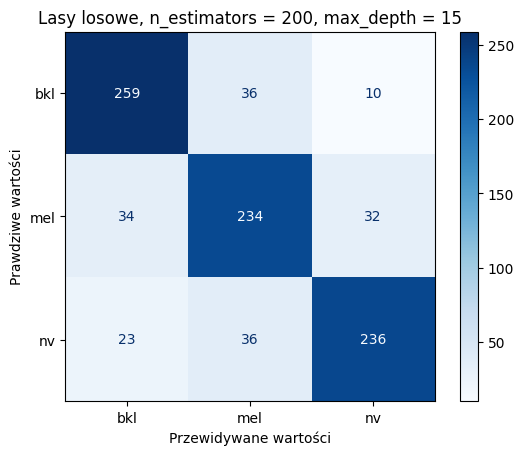

Accuracy: 0.81
              precision    recall  f1-score   support

         bkl       0.82      0.85      0.83       305
         mel       0.76      0.78      0.77       300
          nv       0.85      0.80      0.82       295

    accuracy                           0.81       900
   macro avg       0.81      0.81      0.81       900
weighted avg       0.81      0.81      0.81       900



In [23]:
clf = RandomForestClassifier(n_estimators=200, random_state=4, max_depth=20)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.xlabel("Przewidywane wartości")
plt.ylabel("Prawdziwe wartości")
plt.title("Lasy losowe, n_estimators = 200, max_depth = 15")
plt.show()

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [24]:
sample_sizes = np.arange(100, 2000, 100)
accurancy_list = []
recall_list = []

for target_size in sample_sizes:
    balanced_df_small = (
        df_small.groupby('disease', group_keys=False)  
        .apply(lambda x: x.sample(n=target_size, random_state=42, replace=True))  
    )
    #print(balanced_df.shape)
    X_s = balanced_df_small.drop(columns=['disease', 'path']) 
    y_s = balanced_df_small['disease']  
    X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=1)

    clf = RandomForestClassifier(n_estimators=200, random_state=4, max_depth=15)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

   # conf_matrix = confusion_matrix(y_test, y_pred)

   # disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=clf.classes_)
   # disp.plot(cmap=plt.cm.Blues)
   # plt.show()
    accurancy_list.append(accuracy_score(y_test, y_pred))
    recall_list.append(recall_score(y_test, y_pred, average="weighted"))
    #print("Accuracy:", accuracy_score(y_test, y_pred))
    #print(classification_report(y_test, y_pred))
    #print(classification_report(y_test, y_pred))

/var/folders/yz/bms59l5j5cl16ztb19ty54s40000gn/T/ipykernel_95019/2688936706.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=target_size, random_state=42, replace=True))
/var/folders/yz/bms59l5j5cl16ztb19ty54s40000gn/T/ipykernel_95019/2688936706.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=target_size, random_state=42, replace=True))
/var/fol

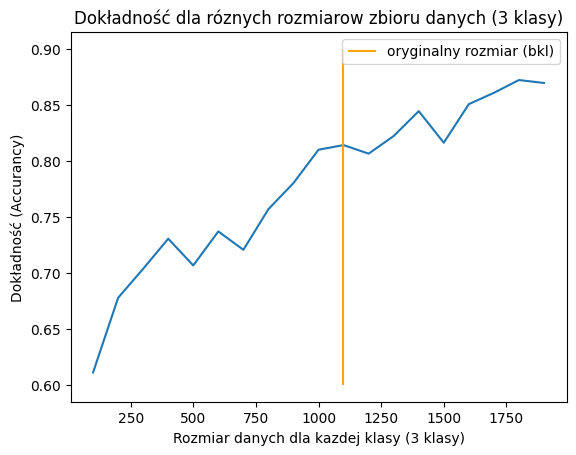

In [340]:
plt.plot(sample_sizes, accurancy_list)
plt.title("Dokładność dla róznych rozmiarow zbioru danych (3 klasy)")
plt.xlabel("Rozmiar danych dla kazdej klasy (3 klasy)")
plt.ylabel("Dokładność (Accurancy)")
plt.vlines(np.min(df_small["disease"].value_counts()), ymin=0.6, ymax=0.9, colors="orange", label = "oryginalny rozmiar (bkl)")
plt.legend()

In [199]:
df_small["disease"].value_counts()

disease
nv     6705
mel    1113
bkl    1099
Name: count, dtype: int64

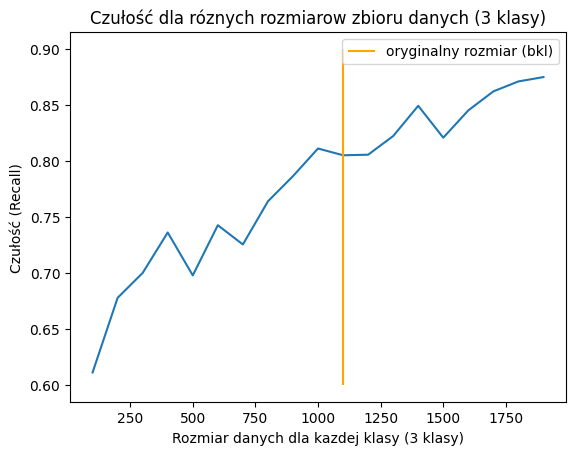

In [201]:
plt.plot(sample_sizes, recall_list)
plt.title("Czułość dla róznych rozmiarow zbioru danych (3 klasy)")
plt.xlabel("Rozmiar danych dla kazdej klasy (3 klasy)")
plt.ylabel("Czułość (Recall)")
plt.vlines(np.min(df_small["disease"].value_counts()), ymin=0.6, ymax=0.9, colors="orange", label = "oryginalny rozmiar (bkl)")
plt.legend()

# Binary Random Forest Classifier

In [25]:
df_binary = df.copy()

In [26]:
df_binary['binary_disease'] = df_binary['disease'].apply(lambda x: 'mel' if x == 'mel' else 'non-mel')


In [27]:
df_binary["binary_disease"].value_counts()

binary_disease
non-mel    8901
mel        1113
Name: count, dtype: int64

In [28]:
X = df_binary.drop(columns=['disease', 'path', "binary_disease"]) 
y = df_binary['binary_disease']  

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [32]:
max_depth_values = [5, 10, 15, 20, 25, None]

cv_scores = []

for max_depth in max_depth_values:
    rf = RandomForestClassifier(max_depth=max_depth, n_estimators=200, random_state=4)
    scores = cross_val_score(rf, X_train, y_train, cv=4, scoring='accuracy')
    cv_scores.append(np.mean(scores))

best_depth = max_depth_values[np.argmax(cv_scores)]

print("Wyniki walidacji krzyżowej dla różnych max_depth:")
for depth, score in zip(max_depth_values, cv_scores):
    print(f"max_depth={depth}: Średnia dokładność = {score:.4f}")

print(f"Najlepsza wartość max_depth: {best_depth}")


Wyniki walidacji krzyżowej dla różnych max_depth:
max_depth=5: Średnia dokładność = 0.8874
max_depth=10: Średnia dokładność = 0.8923
max_depth=15: Średnia dokładność = 0.8927
max_depth=20: Średnia dokładność = 0.8933
max_depth=25: Średnia dokładność = 0.8930
max_depth=None: Średnia dokładność = 0.8930
Najlepsza wartość max_depth: 20


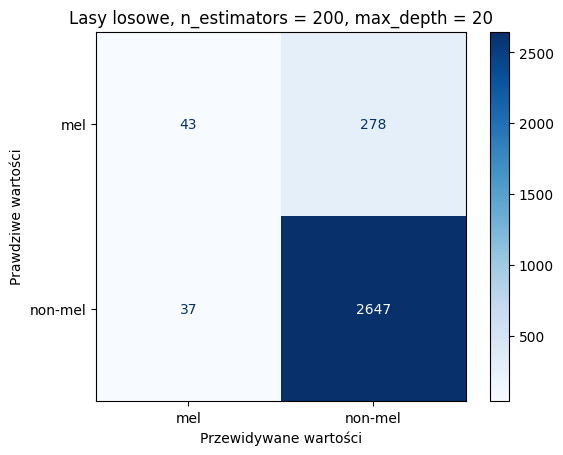

Accuracy: 0.8951747088186356
              precision    recall  f1-score   support

         mel       0.54      0.13      0.21       321
     non-mel       0.90      0.99      0.94      2684

    accuracy                           0.90      3005
   macro avg       0.72      0.56      0.58      3005
weighted avg       0.87      0.90      0.87      3005



In [35]:
clf = RandomForestClassifier(n_estimators=200, random_state=4, max_depth=20)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.xlabel("Przewidywane wartości")
plt.ylabel("Prawdziwe wartości")
plt.title("Lasy losowe, n_estimators = 200, max_depth = 20")
plt.show()

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [42]:
df_binary["disease"]

0          bkl
1          bkl
2          bkl
3          bkl
4          bkl
         ...  
10009    akiec
10010    akiec
10011    akiec
10012    akiec
10013      mel
Name: disease, Length: 10014, dtype: object

In [44]:
df_binary['binary_disease'] = df_binary['binary_disease'].astype(str)

In [47]:
df_binary["binary_disease"].isnull().sum()

0

In [109]:
target_size = 1000

balanced_binary = (
    df_binary.groupby('binary_disease', group_keys=False)  
      .apply(lambda x: x.sample(n=target_size, random_state=42, replace=True))  
)
print(balanced_binary['binary_disease'].value_counts())

binary_disease
mel        1000
non-mel    1000
Name: count, dtype: int64


/var/folders/yz/bms59l5j5cl16ztb19ty54s40000gn/T/ipykernel_95019/3139606494.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=target_size, random_state=42, replace=True))


In [110]:
X = balanced_binary.drop(columns=['disease', 'path', "binary_disease"]) 
y = balanced_binary['binary_disease']  

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

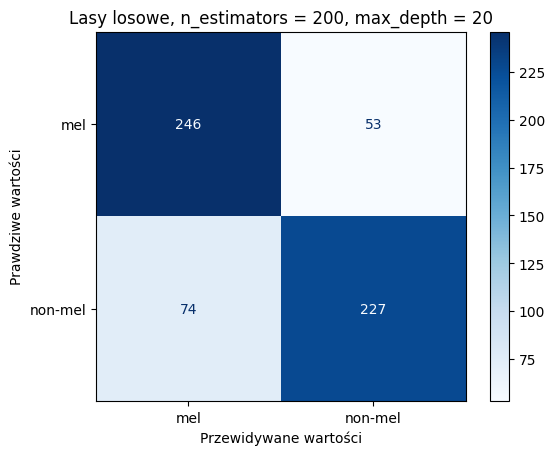

Accuracy: 0.7883333333333333
              precision    recall  f1-score   support

         mel       0.77      0.82      0.79       299
     non-mel       0.81      0.75      0.78       301

    accuracy                           0.79       600
   macro avg       0.79      0.79      0.79       600
weighted avg       0.79      0.79      0.79       600



In [112]:
clf = RandomForestClassifier(n_estimators=200, random_state=4, max_depth=20)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.xlabel("Przewidywane wartości")
plt.ylabel("Prawdziwe wartości")
plt.title("Lasy losowe, n_estimators = 200, max_depth = 20")
plt.show()

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [49]:
df_binary['binary_disease'] = df_binary['disease'].apply(lambda x: 'mel' if x == 'mel' else 'non-mel')
sample_sizes = np.arange(100, 2000, 100)
accurancy_list = []
recall_list = []

for target_size in sample_sizes:
    balanced_binary = (
        df_binary.groupby('binary_disease', group_keys=False)
        .apply(lambda x: x.sample(n=target_size, random_state=42, replace=True))
    )
    X = balanced_binary.drop(columns=['disease', 'path', 'binary_disease'])  
    y = balanced_binary['binary_disease']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    clf = RandomForestClassifier(n_estimators=200, random_state=4, max_depth=20)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accurancy_list.append(accuracy_score(y_test, y_pred))
    recall_list.append(recall_score(y_test, y_pred, pos_label='mel'))  

    #conf_matrix = confusion_matrix(y_test, y_pred, labels=['mel', 'non-mel'])
    #disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['mel', 'non-mel'])
    #disp.plot(cmap=plt.cm.Blues)
    #plt.title(f"Confusion Matrix (rozmiar: {target_size})")
    #plt.show()

/var/folders/yz/bms59l5j5cl16ztb19ty54s40000gn/T/ipykernel_95019/783466382.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=target_size, random_state=42, replace=True))
/var/folders/yz/bms59l5j5cl16ztb19ty54s40000gn/T/ipykernel_95019/783466382.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=target_size, random_state=42, replace=True))
/var/folde

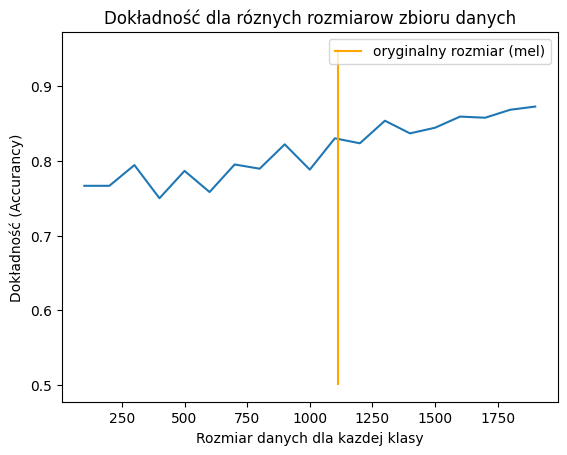

In [50]:
plt.plot(sample_sizes, accurancy_list)
plt.title("Dokładność dla róznych rozmiarow zbioru danych")
plt.xlabel("Rozmiar danych dla kazdej klasy")
plt.ylabel("Dokładność (Accurancy)")
plt.vlines(np.min(df_binary["binary_disease"].value_counts()), ymin=0.5, ymax=0.95, colors="orange", label = "oryginalny rozmiar (mel)")
plt.legend()

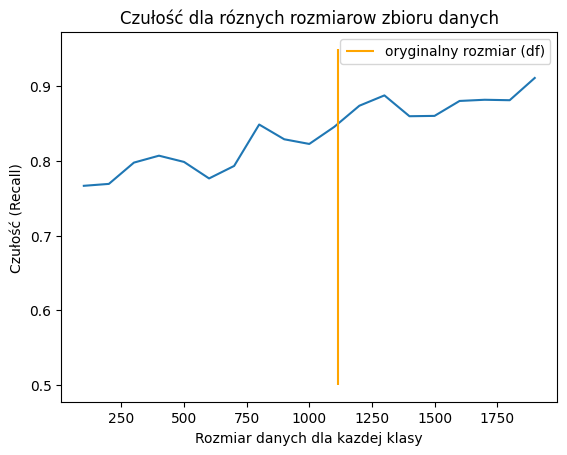

In [51]:
plt.plot(sample_sizes, recall_list)
plt.title("Czułość dla róznych rozmiarow zbioru danych")
plt.xlabel("Rozmiar danych dla kazdej klasy")
plt.ylabel("Czułość (Recall)")
plt.vlines(np.min(df_binary["binary_disease"].value_counts()), ymin=0.5, ymax=0.95, colors="orange", label = "oryginalny rozmiar (df)")
plt.legend()

In [134]:
false_positives = X_test[(y_test == 'non-mel') & (y_pred == 'mel')]

false_positives['original_class'] = df.loc[false_positives.index, 'disease']  

confused_classes = false_positives['original_class'].value_counts()

print("Klasy najczęściej mylone jako 'mel':")
print(confused_classes)

Klasy najczęściej mylone jako 'mel':
original_class
nv       59
bkl      22
bcc       6
akiec     6
vasc      1
Name: count, dtype: int64


/var/folders/yz/bms59l5j5cl16ztb19ty54s40000gn/T/ipykernel_1199/3496006462.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  false_positives['original_class'] = df.loc[false_positives.index, 'disease']
